Dataset yang akan dipakai bebas, namun minimal memiliki 1000 sampel.
Harus menggunakan LSTM dalam arsitektur model.
Validation set sebesar 20% dari total dataset.
Model harus menggunakan model sequential.
Harus menggunakan Learning Rate pada Optimizer.
MAE < 10% skala data.

In [31]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [32]:
! pip install opendatasets --upgrade --quiet

In [33]:
import opendatasets as od
import os

datasets_url = 'https://www.kaggle.com/datasets/samuelcortinhas/time-series-practice-dataset'
od.download(datasets_url)

Skipping, found downloaded files in "./time-series-practice-dataset" (use force=True to force download)


In [34]:
data_dir = './time-series-practice-dataset'
os.listdir(data_dir)

['test.csv', 'train.csv']

In [35]:
import pandas as pd

df = pd.read_csv(data_dir + '/train.csv')

In [36]:
df.head()

,Date,store,product,number_sold
0,2010-01-01,0,0,801
1,2010-01-02,0,0,810
2,2010-01-03,0,0,818
3,2010-01-04,0,0,796
4,2010-01-05,0,0,808


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230090 entries, 0 to 230089
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Date         230090 non-null  object
 1   store        230090 non-null  int64 
 2   product      230090 non-null  int64 
 3   number_sold  230090 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.0+ MB


In [38]:
df = df[(df['store'] == 0) & (df['product'] == 0)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3287 entries, 0 to 3286
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         3287 non-null   object
 1   store        3287 non-null   int64 
 2   product      3287 non-null   int64 
 3   number_sold  3287 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 128.4+ KB


In [39]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3287 entries, 0 to 3286
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         3287 non-null   datetime64[ns]
 1   store        3287 non-null   int64         
 2   product      3287 non-null   int64         
 3   number_sold  3287 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 128.4 KB


In [40]:
df.set_index('Date', inplace=True)
df.drop(columns=['store', 'product'], inplace=True)
df.head()

,number_sold
Date,
2010-01-01,801
2010-01-02,810
2010-01-03,818
2010-01-04,796
2010-01-05,808


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3287 entries, 2010-01-01 to 2018-12-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   number_sold  3287 non-null   int64
dtypes: int64(1)
memory usage: 51.4 KB


<AxesSubplot:xlabel='Date'>

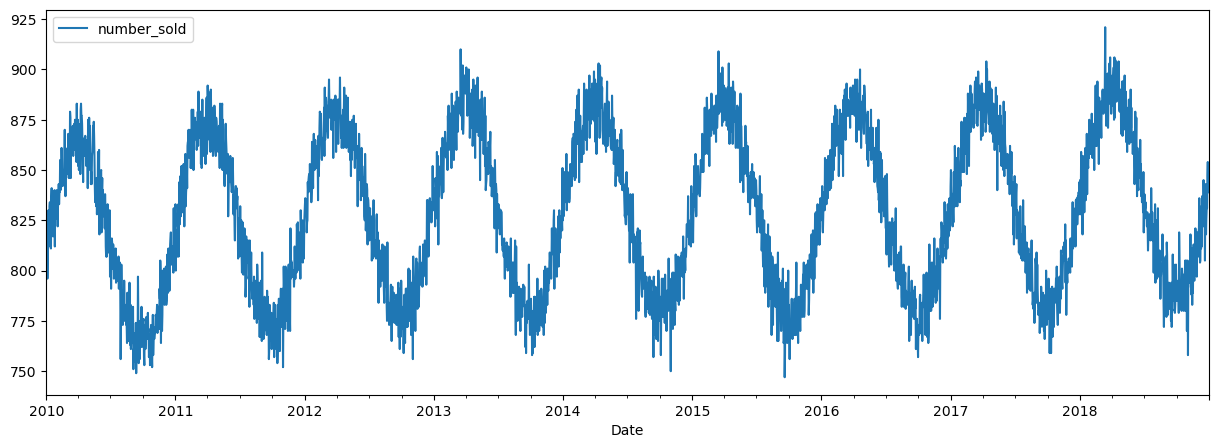

In [42]:
df.plot(figsize=(15, 5))

In [43]:
data = df.values
data.shape

(3287, 1)

In [44]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(np.array(data))
scaled.shape

(3287, 1)

In [45]:
train_size = int(len(scaled) * 0.8)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size, :], scaled[train_size:len(scaled), :]
print(len(train), len(test))
print(len(train)/len(scaled), len(test)/len(scaled))

2629 658
0.7998174627319744 0.20018253726802557


In [46]:
x_train = []
y_train = []
time_steps = 30
n_cols = 1

for i in range(time_steps, len(train)):
    x_train.append(train[i-time_steps:i, :n_cols])
    y_train.append(train[i, :n_cols])
    if i<=time_steps:
        print('X_train: ', x_train)
        print('y_train:' , y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

X_train:  [array([[0.31034483],
       [0.36206897],
       [0.40804598],
       [0.2816092 ],
       [0.35057471],
       [0.37356322],
       [0.47701149],
       [0.37356322],
       [0.40229885],
       [0.48850575],
       [0.5       ],
       [0.45402299],
       [0.43103448],
       [0.36781609],
       [0.51149425],
       [0.54022989],
       [0.40804598],
       [0.45977011],
       [0.43103448],
       [0.40229885],
       [0.5       ],
       [0.44827586],
       [0.42528736],
       [0.53448276],
       [0.37356322],
       [0.50574713],
       [0.49425287],
       [0.49425287],
       [0.49425287],
       [0.53448276]])]
y_train: [array([0.45402299])]


In [47]:
x_train.shape, y_train.shape

((2599, 30, 1), (2599, 1))

In [48]:
x_test = []
y_test = []

for i in range(time_steps, len(test)):
    x_test.append(test[i-time_steps:i, :n_cols])
    y_test.append(test[i, :n_cols])
    if i<=time_steps:
        print('X_test: ', x_test)
        print('y_test:' , y_test)
        print()
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

X_test:  [array([[0.77586207],
       [0.8045977 ],
       [0.72413793],
       [0.7183908 ],
       [0.75287356],
       [0.87356322],
       [0.76436782],
       [0.7816092 ],
       [0.83333333],
       [0.76436782],
       [0.82183908],
       [0.82758621],
       [0.77011494],
       [0.67816092],
       [0.77586207],
       [0.83908046],
       [0.82183908],
       [0.68965517],
       [0.79885057],
       [0.81034483],
       [0.77586207],
       [0.81034483],
       [0.79885057],
       [0.72988506],
       [0.79885057],
       [0.78735632],
       [0.70114943],
       [0.7183908 ],
       [0.90229885],
       [0.79885057]])]
y_test: [array([0.87931034])]


In [49]:
x_test.shape, y_test.shape

((628, 30, 1), (628, 1))

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], n_cols)),
    LSTM(64, return_sequences=False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss=tf.keras.losses.Huber(), metrics=['mae'])

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 64)                29440     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42465 (165.88 KB)
Trainable params: 42465 (165.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
# callbacks when MAE < 10%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('mae') < 0.1 and logs.get('val_mae') < 0.1):
            print("\nMAE < 10% skala data")
            self.model.stop_training = True

history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=32,
    epochs=100
)

Epoch 1/100
82/82 [==============================] - 1s 8ms/step - loss: 0.0021 - mae: 0.0508 - val_loss: 0.0020 - val_mae: 0.0493
Epoch 2/100
82/82 [==============================] - 1s 7ms/step - loss: 0.0020 - mae: 0.0501 - val_loss: 0.0025 - val_mae: 0.0566
Epoch 3/100
82/82 [==============================] - 1s 7ms/step - loss: 0.0021 - mae: 0.0511 - val_loss: 0.0019 - val_mae: 0.0489
Epoch 4/100
82/82 [==============================] - 1s 7ms/step - loss: 0.0019 - mae: 0.0497 - val_loss: 0.0019 - val_mae: 0.0492
Epoch 5/100
82/82 [==============================] - 1s 7ms/step - loss: 0.0019 - mae: 0.0493 - val_loss: 0.0026 - val_mae: 0.0580
Epoch 6/100
82/82 [==============================] - 1s 7ms/step - loss: 0.0021 - mae: 0.0509 - val_loss: 0.0022 - val_mae: 0.0536
Epoch 7/100
82/82 [==============================] - 1s 7ms/step - loss: 0.0020 - mae: 0.0497 - val_loss: 0.0020 - val_mae: 0.0506
Epoch 8/100
82/82 [==============================] - 1s 7ms/step - loss: 0.0021 - m

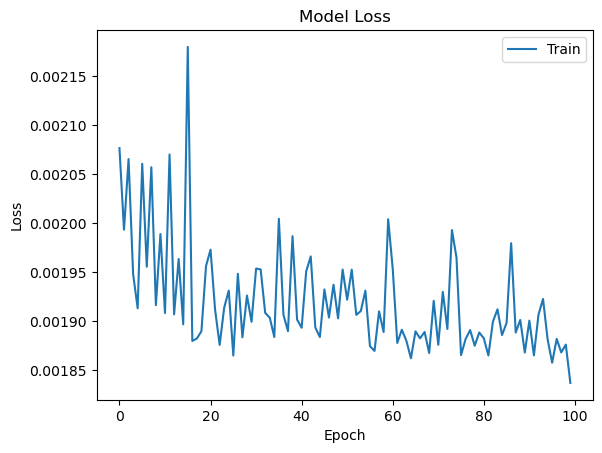

In [65]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

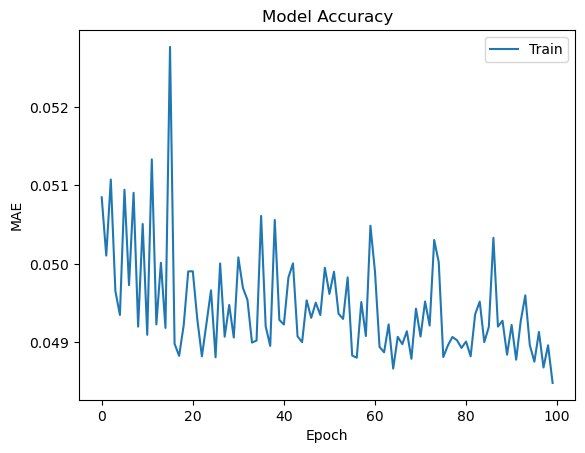

In [66]:
plt.plot(history.history['mae'])
plt.title('Model Accuracy')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

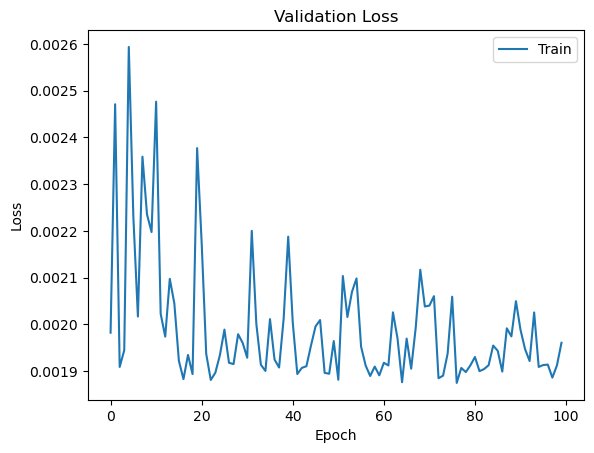

In [67]:
plt.plot(history.history['val_loss'])
plt.title('Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

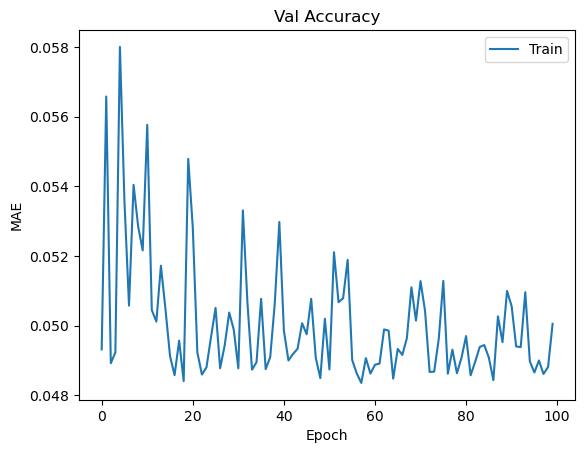

In [68]:
plt.plot(history.history['val_mae'])
plt.title('Val Accuracy')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

In [70]:
# check if MAE < 10% skala data
threshold_mae = (scaled.max() - scaled.min()) * 10/100
print(f'Threshold MAE: {threshold_mae}')
mae = history.history['mae']
val_mae = history.history['val_mae']
last_mae = mae[-1]
last_val_mae = val_mae[-1]
print(f'Last MAE: {last_mae}')
print(f'Last MAE < 10% skala data: {last_mae < threshold_mae}')
print(f'Last Val MAE: {last_val_mae}')
print(f'Last Val MAE < 10% skala data: {last_val_mae < threshold_mae}')

Threshold MAE: 0.1
Last MAE: 0.04848416894674301
Last MAE < 10% skala data: True
Last Val MAE: 0.05005201697349548
Last Val MAE < 10% skala data: True
